In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import h5py
from math import pi

from analysis.config import birds, h5_path_dict, pickle_dir
from analysis.ExpData import ExpData
from analysis.utils import popln_overlap, get_fr

In [3]:
with open(pickle_dir / 'population_patterns.p', 'rb') as f: 
    population_patterns = pickle.load(f)

In [5]:
def plot_overlaps(all_overlaps, title):
    plt.figure()
    plt.hist(all_overlaps, bins=50, alpha=0.4, weights=np.ones(len(all_overlaps)) / len(all_overlaps))
    plt.title(title, fontsize=14)
    plt.ylabel("Proportion of Visits", fontsize=12)
    plt.xlabel("Population Overlap", fontsize=12)
    plt.xlim((0, 1))
    plt.ylim((0, 0.6))
    plt.show()
    print(len(all_overlaps))

# Activity Overlap Between Caching and Retrieval of Same Cache

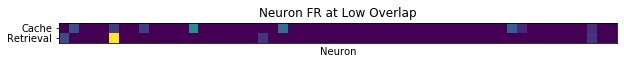

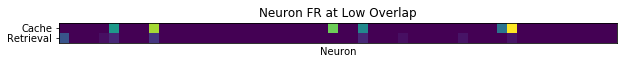

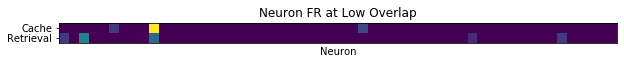

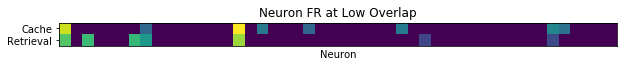

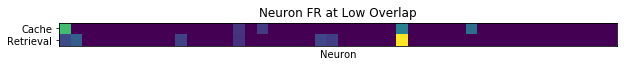

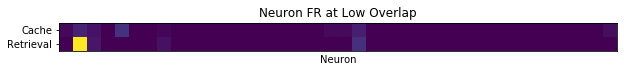

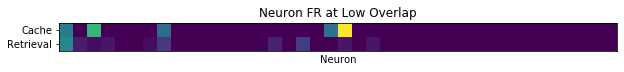

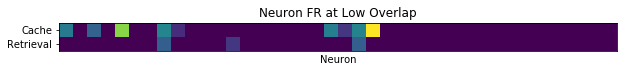

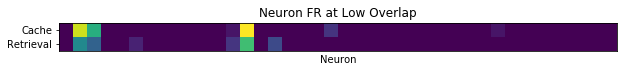

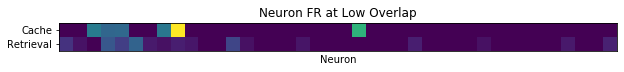

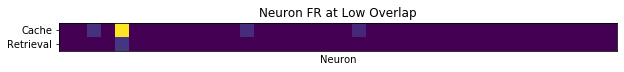

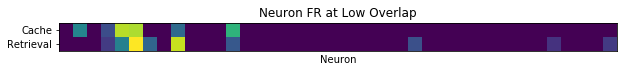

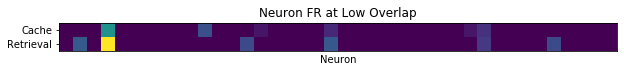

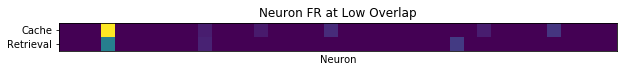

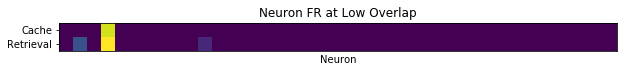

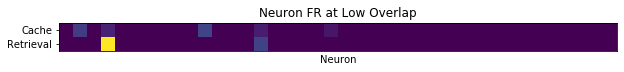

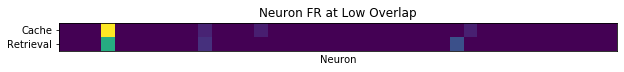

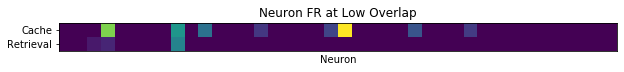

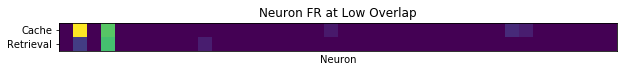

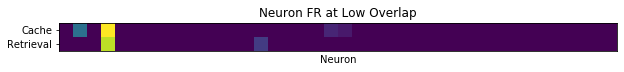

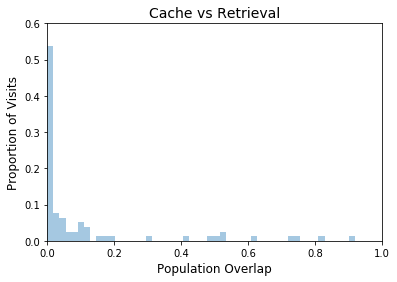

78


In [13]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    visit_s = exp_data.visit_s/exp_data.visit_durs[None,:]
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']

    for i, c_visit in enumerate(c_visits):
        c_site = exp_data.cr_sites[exp_data.cr_was_cache][i]
        cache_pattern = visit_s[:, c_visit]
        for j, r_visit in enumerate(r_visits):
            if r_visit <= c_visit: continue
            r_site = exp_data.cr_sites[exp_data.cr_was_retrieval][j]
            if r_site != c_site: continue
            retriev_pattern = visit_s[:, r_visit]
            overlap = np.nanmax(
                popln_overlap(cache_pattern[:,None], retriev_pattern)
                )
            all_overlaps.append(overlap)
            if overlap > 0.1:
                max_pattern = np.array((cache_pattern, retriev_pattern))
                plt.figure(figsize=(10,10))
                plt.imshow(max_pattern)
                plt.xticks([])
                plt.xlabel("Neuron")
                plt.yticks([0,1], ['Cache', 'Retrieval'])
                plt.title("Neuron FR at Low Overlap")
                plt.show()
            break
        
plot_overlaps(all_overlaps, "Cache vs Retrieval")

# Activity Overlap Between Caching and Retrieval of Different Cache

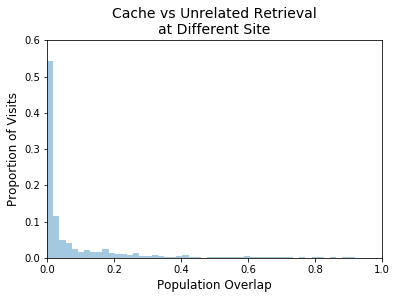

983


In [9]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    visit_s = exp_data.visit_s/exp_data.visit_durs[None,:]
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']

    for i, c_visit in enumerate(c_visits):
        c_site = exp_data.cr_sites[exp_data.cr_was_cache][i]
        cache_pattern = visit_s[:, c_visit]
        mean_overlaps = []
        for j, r_visit in enumerate(r_visits):
            r_site = exp_data.cr_sites[exp_data.cr_was_retrieval][j]
            if r_site == c_site: continue
            retriev_pattern = visit_s[:, r_visit]
            overlap = np.nanmax(
                popln_overlap(cache_pattern[:,None], retriev_pattern)
                )
            mean_overlaps.append(overlap)
        #all_overlaps.append(np.nanmean(mean_overlaps))
        all_overlaps.extend(mean_overlaps)
        
plot_overlaps(all_overlaps, "Cache vs Unrelated Retrieval\nat Different Site")